In [54]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Part 1: Matplotlib
1. Create a line plot comparing total population over time:
   - Choose 5 countries
   - Calculate the total population by country for each year
   - Create a line plot showing population trends
   - Include a legend identifying each country
   - Add appropriate axis labels and title
   - Use different line styles or colors to distinguish the countries

In [47]:
#choosing 5 countries and reading in dataframes
data_dir = "ddf--datapoints--population--by--country--age--gender--year"
countries = ['omn', 'mys', 'nzl', 'syr', 'prk']
data = {}

for country in countries: 
    file_path = os.path.join(data_dir, f'ddf--datapoints--population--by--country-{country}--age--gender--year.csv')
    data[country] = pd.read_csv(file_path)

#combine all the dataframes into a single dataframe
all_countries = pd.concat(data.values(), ignore_index=True)


In [36]:
#calculate total population by country for each year 
total_pop_by_country_year = all_countries.groupby(['country', 'year'])['population'].sum().reset_index()

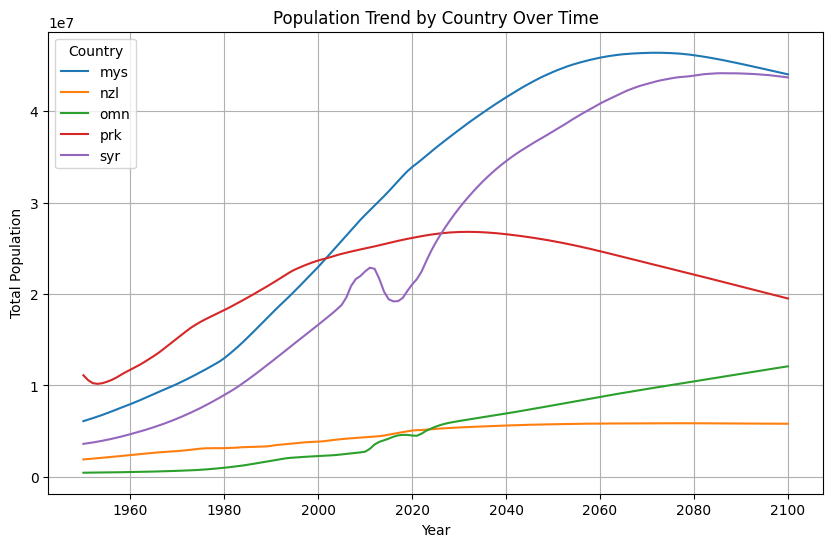

In [40]:
plt.figure(figsize=(10,6))
plt.cm.tab10

#create a line plot showing population trends
for country in total_pop_by_country_year['country'].unique():
    all_countries = total_pop_by_country_year[total_pop_by_country_year['country'] == country]
    plt.plot(
        all_countries['year'],
        all_countries['population'],
        label=country
    )

#adding titles and labels 
plt.title("Population Trend by Country Over Time")
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid()

#legend
plt.legend(title='Country')


2. Investigate demographic shifts using a stacked bar chart:
   - Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020
   - Create a stacked bar chart showing these changes
   - Calculate and display the percentage for each age group
   - Add text annotations showing key percentages
   - Include clear labels and a legend

/tmp/ipykernel_6991/156818569.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = all_countries.groupby(['country', 'year', 'age_group'])['population'].sum().reset_index()


0     36.873437
1     26.654682
2     17.044639
3     10.993645
4      4.536864
        ...    
70    32.604463
71    29.993006
72    17.149186
73    14.147851
74     4.121507
Name: percentage, Length: 75, dtype: float64


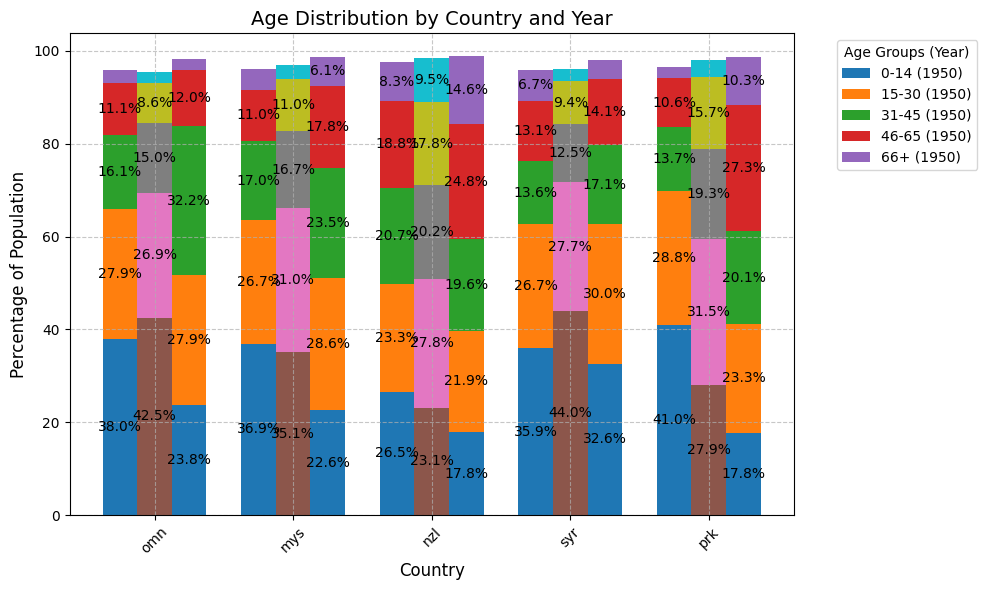

In [68]:
age_bins = [0, 14, 30, 45, 65, float('inf')]
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']
years = [1950, 1985, 2020]

#filter and create age groups 
all_countries['age_group'] = pd.cut(all_countries['age'], bins=age_bins, labels=age_labels, right=True)
age_groups = all_countries.groupby(['country', 'year', 'age_group'])['population'].sum().reset_index()
filtered = age_groups[age_groups['year'].isin(years)]

# Calculate percentages
filtered = filtered.merge(total_pop_by_country_year, on=['country', 'year'], suffixes=('', '_total'))
filtered['percentage'] = (filtered['population'] / filtered['population_total']) * 100
print(filtered['percentage'])

# Create stacked bar chart
plt.figure(figsize=(10, 6))

x = np.arange(len(countries))
width = 0.25

# Plot bars for each year
for i, year in enumerate(years):
    bottom = np.zeros(len(countries))
    year_data = filtered[filtered['year'] == year]
    
    for age_group in age_labels:
        # Get percentages for this age group and ensure proper alignment
        percentages = []
        for country in countries:
            value = year_data[
                (year_data['age_group'] == age_group) & 
                (year_data['country'] == country)
            ]['percentage'].values
            percentages.append(value[0] if len(value) > 0 else 0)
        
        # Create the bar
        bars = plt.bar(x + i*width, percentages, width, bottom=bottom, 
                      label=f'{age_group} ({year})' if i == 0 else None)
        
        # Add labels to bars
        for j, bar in enumerate(bars):
            height = percentages[j]
            if height > 5:  # Only label segments > 5%
                plt.text(bar.get_x() + bar.get_width()/2, bottom[j] + height/2,
                        f'{height:.1f}%',
                        ha='center', va='center')
        
        bottom += np.array(percentages)

plt.title('Age Distribution by Country and Year', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Population', fontsize=12)
plt.xticks(x + width, countries, rotation=45)
plt.legend(title='Age Groups (Year)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Part 2: Seaborn

1. Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.
   - Use seaborn's heatmap function
   - Add clear annotations and labels
   - Write a brief explanation of what the heatmap reveals about the population structure


/tmp/ipykernel_6991/658525238.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = heatmap_data.pivot_table(


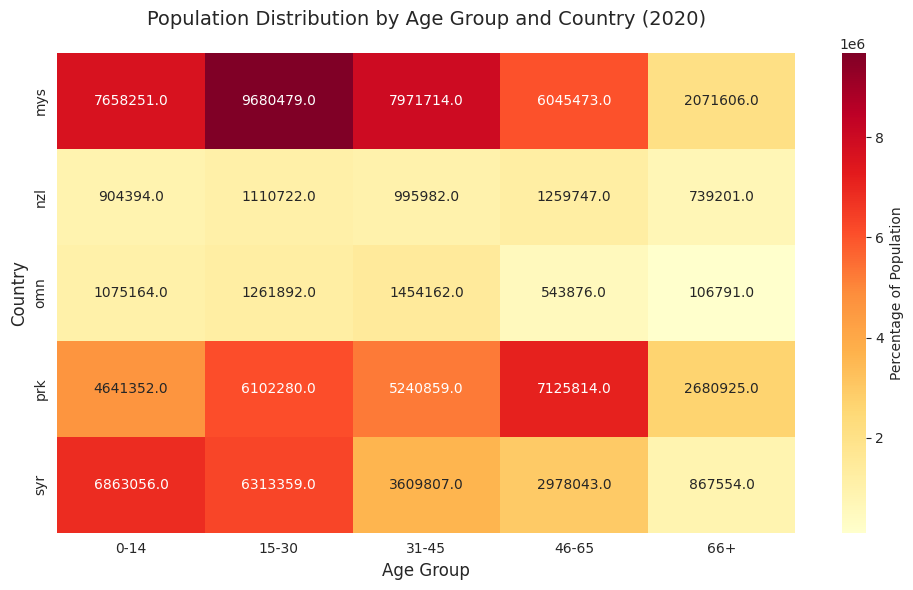

In [74]:
plt.figure(figsize=(10,6))

year_of_interest = 2020
heatmap_data = all_countries[(all_countries['country'].isin(countries)) & (all_countries['year'] == year_of_interest)].copy()

#create pivot table for heatmap
pivot_data = heatmap_data.pivot_table(
    values='population',
    index='country',
    columns='age_group',
    aggfunc='sum'
).round(1)

sns.set_style("whitegrid")
sns.color_palette("husl", 8)
# Create heatmap
sns.heatmap(pivot_data, 
            annot=True, 
            fmt='.1f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Percentage of Population'},
            annot_kws={'size': 10})

plt.title(f'Population Distribution by Age Group and Country ({year_of_interest})', 
          pad=20, 
          fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

The heatmap shows that mys is the most populated country, followed by syr and prk. The most populated age group in syr is 0.14, in prk is 46-65, in omn is 31-45, in nzl is 46-65, and in mys 15-30. Most of the countries have differently dense age groups.

2. Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.
   - Create side-by-side violin plots using seaborn
   - Add clear labels and a title
   - Write a brief comparison of what the plots reveal

<Axes: xlabel='country', ylabel='age'>

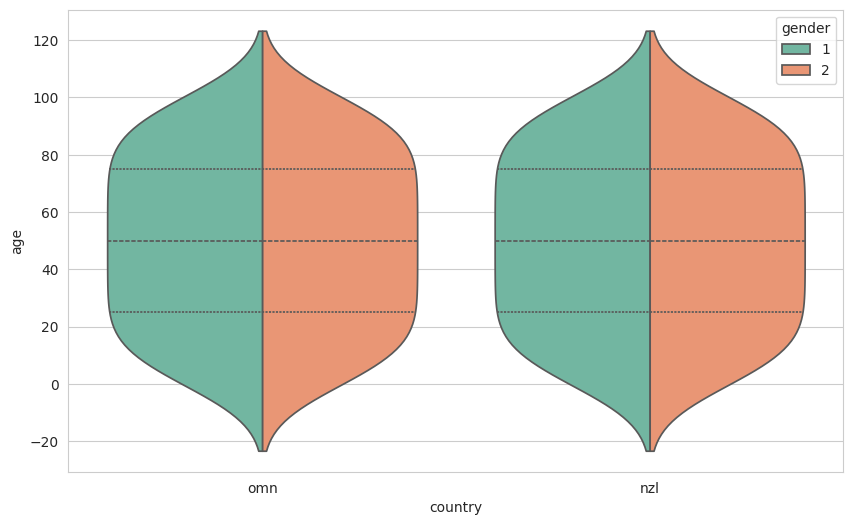

In [80]:
# Select two countries and filter data for 2020
violin_countries = ['omn', 'nzl']  # Chosen for contrasting demographics
year = 2020

# Filter data
violin_data = all_countries[
    (all_countries['country'].isin(violin_countries)) & 
    (all_countries['year'] == year)
].copy()

plt.figure(figsize=(10, 6))
# Create violin plot
sns.violinplot(data=violin_data,
               x='country',
               y='age',
               hue='gender',
               split=True,
               inner='quart',  # Show quartiles inside violin
               palette='Set2')

The violin plots suggest that the age distributions separated by gender are equal in the two countries in 2020. 

3. Create a pairplot comparing population metrics across four countries:
   - Select four countries of your choice
   - Include all variables in the dataset
   - Use the country as the hue parameter to distinguish between countries
   - Write a brief summary of any patterns or relationships revealed by the pairplot

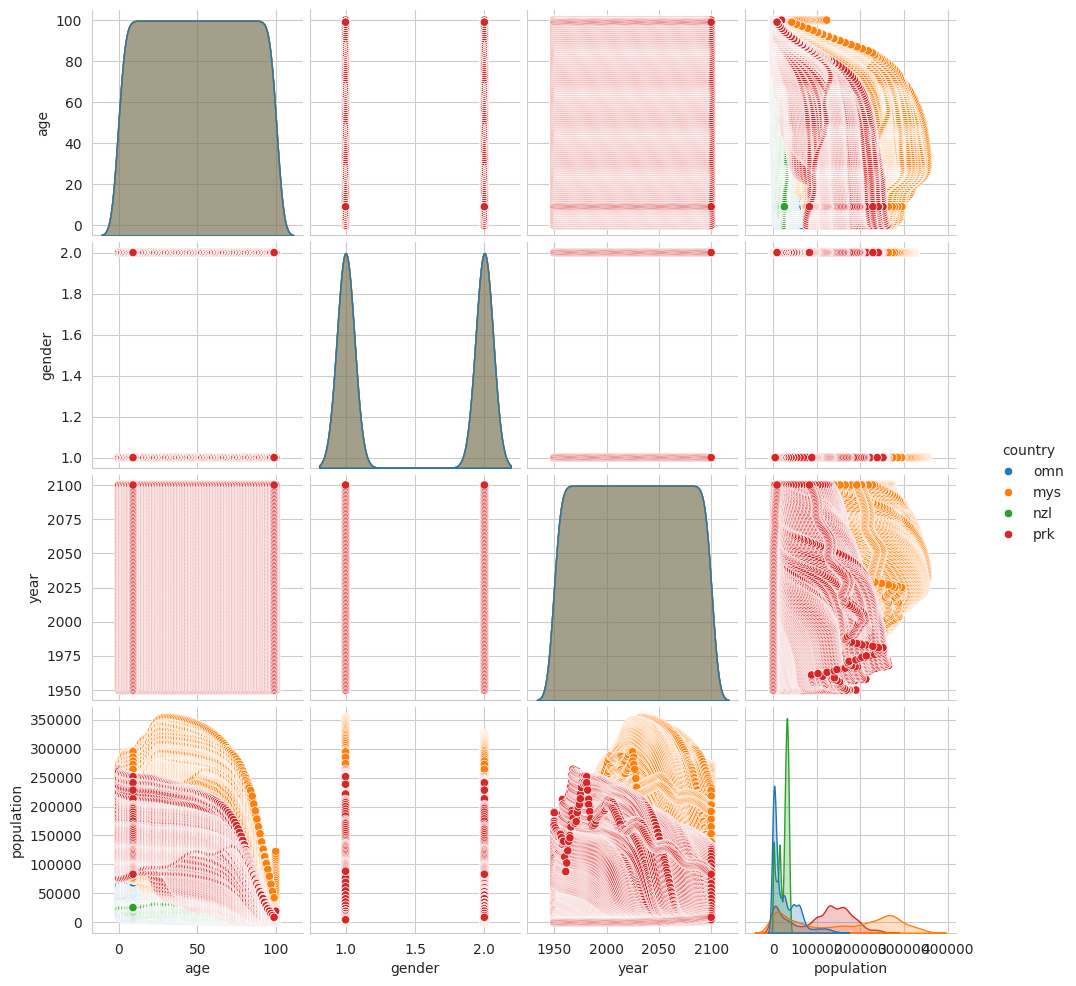

In [84]:
pairplot_countries = ['nzl', 'omn', 'mys', 'prk']
pairplot_data = all_countries[all_countries['country'].isin(pairplot_countries)]

pairplot = sns.pairplot(
    data=pairplot_data,
    hue='country',
    vars=['age', 'gender', 'year', 'population'],
    height=2.5
)


The data shows that mys and prk are similar in their demographics, namely population, age, and year. The overlap of the points makes it difficult to make other conclusions from the pairplots.